## **INTRODUCTION TO RADIO ASTRONOMY**

# Why Radio Astronomy?
Radio astronomy is a critical field in astronomy due to its ability to study celestial objects and phenomena using radio waves. By overcoming the limitations of other wavelengths, radio astronomy allows us to explore obscured regions of space, detect pulsars, quasars, and cosmic microwave background radiation, and map the universe's large-scale structures. It also provides valuable insights into the interstellar medium and cosmic magnetism. Through its contributions to cosmology and advancements in technology, radio astronomy continues to unveil the mysteries of the universe and shape our understanding of its evolution and composition.


This is a series of tutorials which will allow a lay man to be well versed with Radio Astronomy too. Though, you need to have some background on Python and libraries like Astropy beforehand. A great tool to study basics of Data Analysis in Astronomy : __[here](https://github.com/krittikaiitb/tutorials)__ These are the tutorials posted by Krittika: The Astronomy and Astrophysics Club of IIT Bombay.

Once you are well versed in Python, we can proceed further. 



# Electromagnetic Spectrum

We can only see a small segment of the night sky, what visible light allows us to see.
Multi-wavelength Astronomy is about getting the complete picture. The electro-
magnetic spectrum encompasses the entire range of light, incorporating a diverse
array of colors we typically perceive. Within this spectrum, we encounter various
types of radiation, including gamma rays, X-rays, ultraviolet, visible light, infrared,
microwaves, and radio waves. The key distinguishing factor among these types
of radiation lies in their characteristic wavelength or frequency. As we move from
gamma rays to radio waves, wavelengths increase while frequencies decrease.
Remarkably, all these forms of radiation travel at a uniform speed known as the
speed of light, which amounts to approximately 186,000 miles per second (or 300
million meters per second).
Studying the Universe across the vast expanse of the electromagnetic spectrum
grants us a more comprehensive understanding of celestial objects. Each segment
of the spectrum offers invaluable and distinct information. X-rays and gamma rays
unveil insights into energetic phenomena like black holes, supernova remnants, hot
gas, and neutron stars. Ultraviolet light exposes hot stars and quasars, while visible
light illuminates warmer stars, planets, nebulae, and galaxies. Infrared observations
unveil cool stars, regions of star formation, dusty cosmic expanses, and the heart
of our galaxy. Radio radiation allows us to explore cold molecular clouds and
reveals the remnants of the cosmic background radiation, a remnant from the
early stages of the universe known as the Big Bang




In this tutorial, we will learn how to get galaxy images in different wavelengths.We will compare the images from different telescopes to see how astrophysical objects differ in their emission at different wavelengths. To obtain the images, we will use the CIRADA image cutout web service (http://cutouts.cirada.ca/get_cutout/). 




Once you open the link, we manually enter the coordinates or name of the object you would like to see - a list of interesting objects can be found at https://ragolu.science.ru.nl/hcat.html. For best radio images, we generally choose images from the Jet and Lobes Section but I will leave that task up to you. I'm interested in using both the VLASS survey for radio images and the WISE survey for infrared images. For the radio images, I'll consider all available epochs or filters to get a comprehensive view. Similarly, I'll use all available epochs or filters in the WISE survey to study infrared emissions from celestial objects. I can also include optical data from PANSTARRS or SDSS to enhance our understanding across different wavelengths.

Choose the cutout size you want ; 1-2 arcminutes is a reasonable starting point. The other fields can remain blank and voila! You press enter and get fits images of the respective servers that you chose. Now you simply download the images

We will take three galaxies: namely, Whirlpool Galaxy and Sunflower Galaxy. I have provided with the fits images in the repo itself but it's highly appreciated if you do the same for other galaxies, especially from the Jets and Lobes Sections.

In [4]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats


To simplify the process, I'll create three functions named Optical, Infrared, and Radio. Each function will take a file as input and return the corresponding wavelength image based on its specific survey. Nonetheless, feel free to handle these functions separately if you prefer.

In [5]:
def Optical(file, a):
    """
    Function to display the optical wavelength image from the provided FITS file.

    Parameters:
        file (str): File path of the optical image data in FITS format.
        a (float): Number of standard deviations for scaling the image.
    """
    Galaxy_Image = fits.open(file)
    mean, median, std = sigma_clipped_stats(Galaxy_Image[0].data)
    plt.imshow(Galaxy_Image[0].data, vmin=median - a*std, vmax=median + a*std, cmap='gray')
    plt.colorbar()

def infrared(file, a):
    """
    Function to display the infrared wavelength image from the provided FITS file.

    Parameters:
        file (str): File path of the infrared image data in FITS format.
        a (float): Number of standard deviations for scaling the image.
    """
    Galaxy_image = fits.open(file)
    Data = Galaxy_image[0].data
    mean, median, std = sigma_clipped_stats(Data)
    plt.imshow(Data, vmin=median - a*std, vmax=median + a*std, cmap='gray')
    plt.colorbar()

def Radio(file, a):
    """
    Function to display the radio wavelength image from the provided FITS file.

    Parameters:
        file (str): File path of the radio image data in FITS format.
        a (float): Number of standard deviations for scaling the image.
    """
    Galaxy_image = fits.open(file)
    Data = Galaxy_image[0].data[0, 0, :, :]
    mean, median, std = sigma_clipped_stats(Data)
    plt.imshow(Data, vmin=median - a*std, vmax=median + a*std, cmap='gray')
    plt.colorbar()


Now, our task is quite simple. We just run the function for each galaxy that we chose. 

**NOTE** : Sigma clipping is utilized in this context to calculate the statistical properties (mean, median, and standard deviation) of the data while mitigating the effects of outliers and noise in the image.

In astronomical images, outliers can arise due to various factors, like cosmic rays or instrumental artifacts, and noise may be present in certain regions. To obtain more accurate statistics, sigma clipping involves iteratively estimating the mean and standard deviation while excluding data points that deviate significantly from the mean.

By iteratively rejecting outliers, sigma clipping ensures that the displayed image has an appropriate color scale range, making it more informative and easier to interpret. This process enhances the visualization of relevant structures in radio, infrared, and optical astronomy, while minimizing the impact of anomalies that could distort the statistical analysis.






# WHIRLPOOL GALAXY

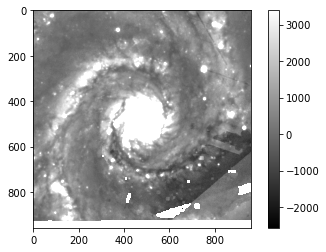

In [6]:
Optical('Whirlpool_optical.fits', 4)  #Optical Image

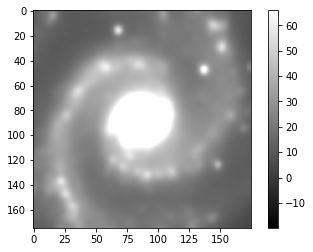

In [7]:
infrared('Whirlpool_ir_3.4um.fits', 4) #Infrared Image

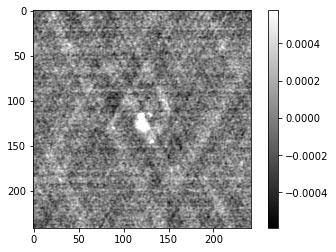

In [8]:
Radio('whirlpool_radio.fits', 4) #Radio image

# SUNFLOWER GALAXY

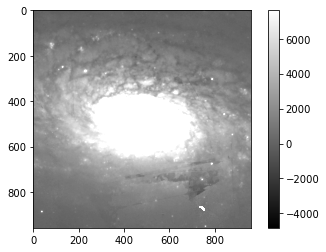

In [12]:
Optical('Sunflower_optical.fits',4) #Optical image

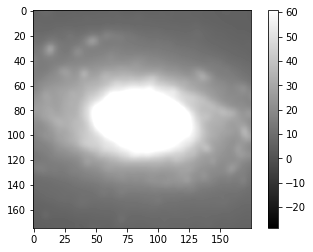

In [13]:
infrared('Sunflower_IR_3.4um.fits', 4) #Infrared image

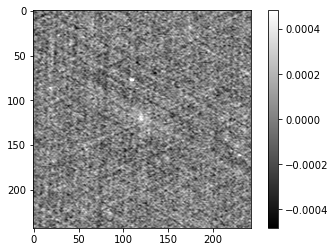

In [14]:
Radio('Sunflower_radio.fits', 4) #Radio image

To help get more adjusted with this, I would suggest you to try this on your own and use images from the Jets and Lobes section. You will actually be able to see beautiful radio images of galaxies from that section.